Import Libraries

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

Load Dataset

In [9]:
# Read data from CSV file
df3 = pd.read_csv('data.csv', sep=",", decimal=".")

# Calculate z-scores for the 'price' column and filter out values with z-scores greater than 0.8 for data normalization
from scipy.stats import zscore
z_scores = zscore(df3["price"])
abs_z_scores = np.abs(z_scores)
df3 = df3[(abs_z_scores < 0.8)]

# Drop redundant columns from the DataFrame
df3 = df3.drop(["date", "waterfront", "view", "yr_built", "yr_renovated", "street", "statezip", "country"], axis=1)

# Check for missing values in the DataFrame (There are no missing values)
missing_values = df3.isnull().sum()

# Perform one-hot encoding for the 'city' column to get rid of categorical data
df3 = pd.get_dummies(df3, columns=['city'])
# Convert boolean values to integers (1 for True, 0 for False)
df3 = df3.astype(int)

# Separate features (x3) and target variable (y3)
x1, y1 = df3.drop(["price"], axis=1), df3[["price"]]


Train-Test Split

In [10]:
# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

Create and Train MLR Model

In [11]:
mlr_model = LinearRegression()
mlr_model.fit(x1_train, y1_train)

LinearRegression()

Make Predictions

In [12]:
mlr_predictions = mlr_model.predict(x1_test)

Evaluate Model Performance

In [13]:
mape_mlr = mean_absolute_percentage_error(y1_test, mlr_predictions)
print(f"MAPE for MLR: {mape_mlr}")


mae_mlr = mean_absolute_error(y1_test, mlr_predictions)
print(f"MAE for MLR: {mae_mlr}")


MAPE for MLR: 0.1982840626348941
MAE for MLR: 80598.56649027207


Scatter Plot

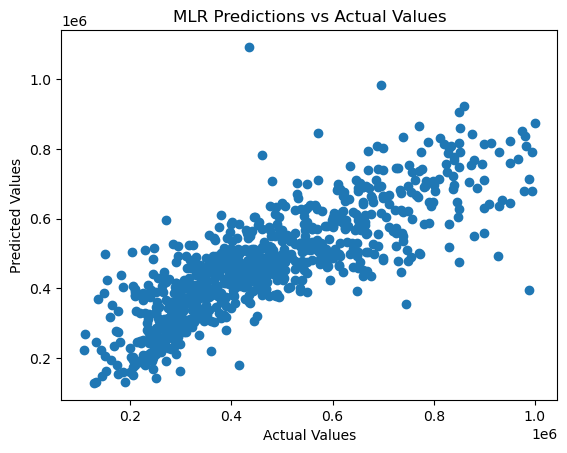

In [14]:
plt.scatter(y1_test, mlr_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("MLR Predictions vs Actual Values")
plt.show()
